# INTERPOLATION ET QUADRATURE

## 1 Introduction

####  Initialisation des variables

In [1]:
rm(list=ls())
graphics.off()

source('functions_ETC2021.r')
a = 0
b = 14
K <- 2.1 ## parametre k  de la loi gamma 
THETA <- 0.5 ## parametre theta de la loi gamma
densite <- function(x){dgamma(x, shape = K, scale = THETA)}

#### Test de la fonction densité

In [2]:
densite(c(1,2,3))

[1] 0.55442227 0.16083653 0.03400135

## 2 Interpolation polynomiale

###### Question 1 

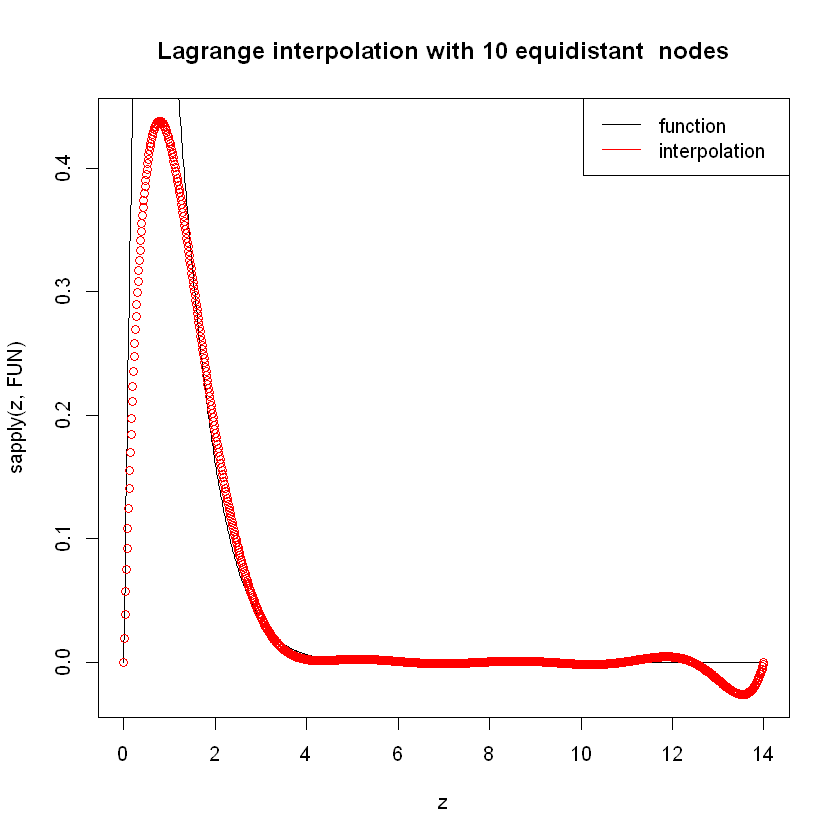

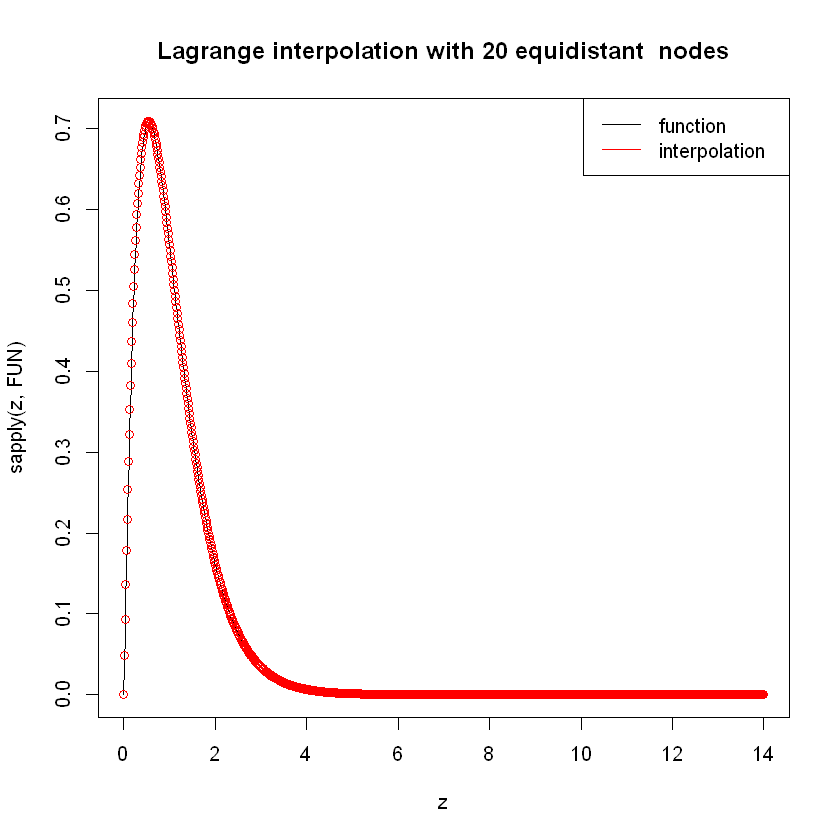

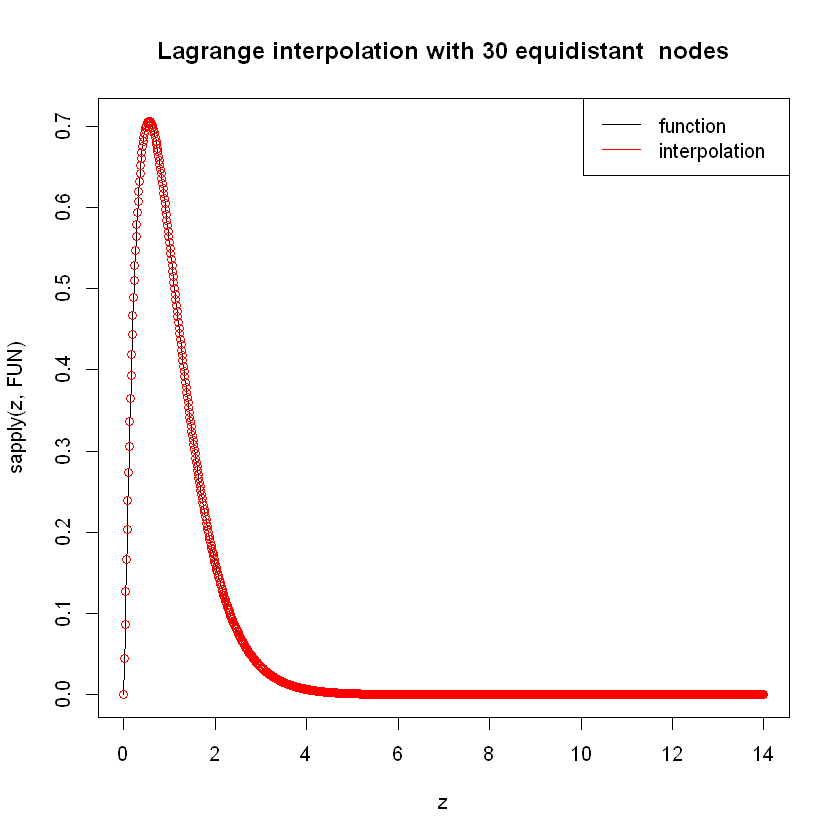

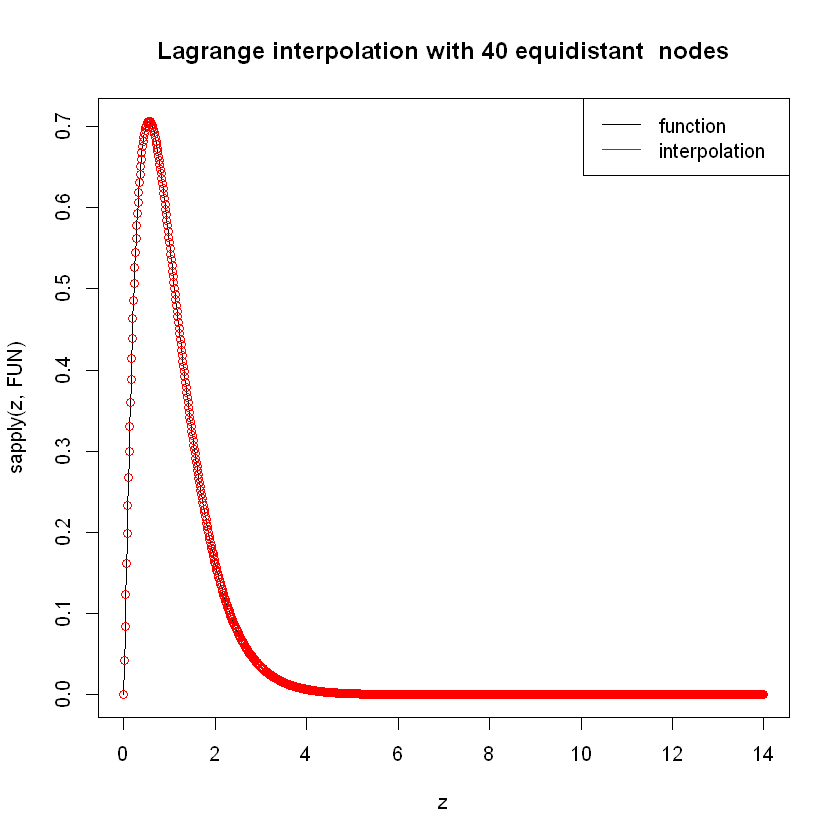

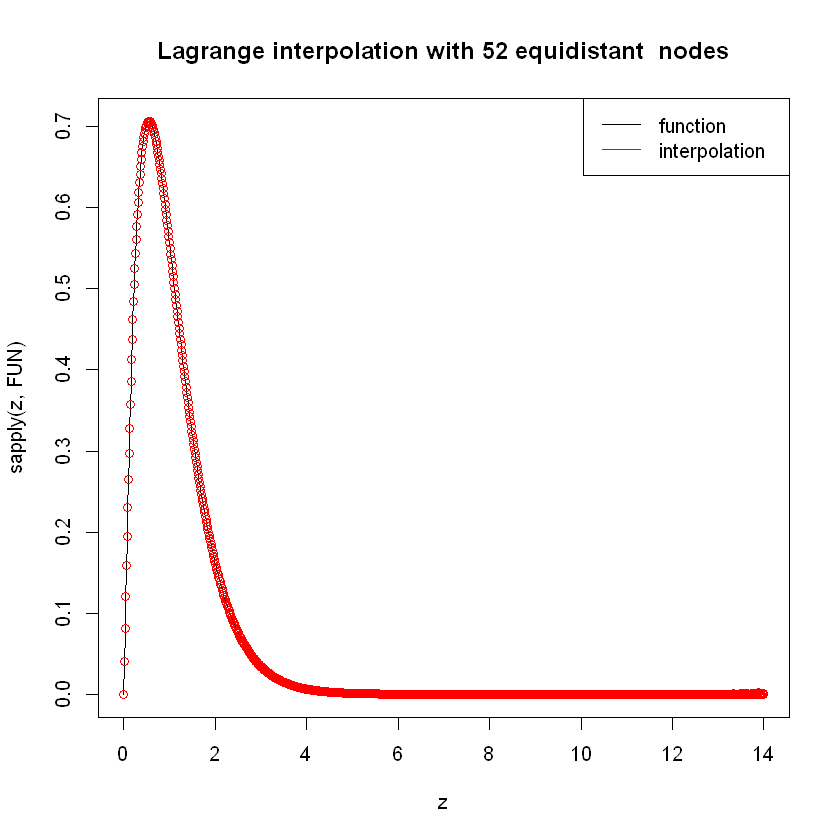

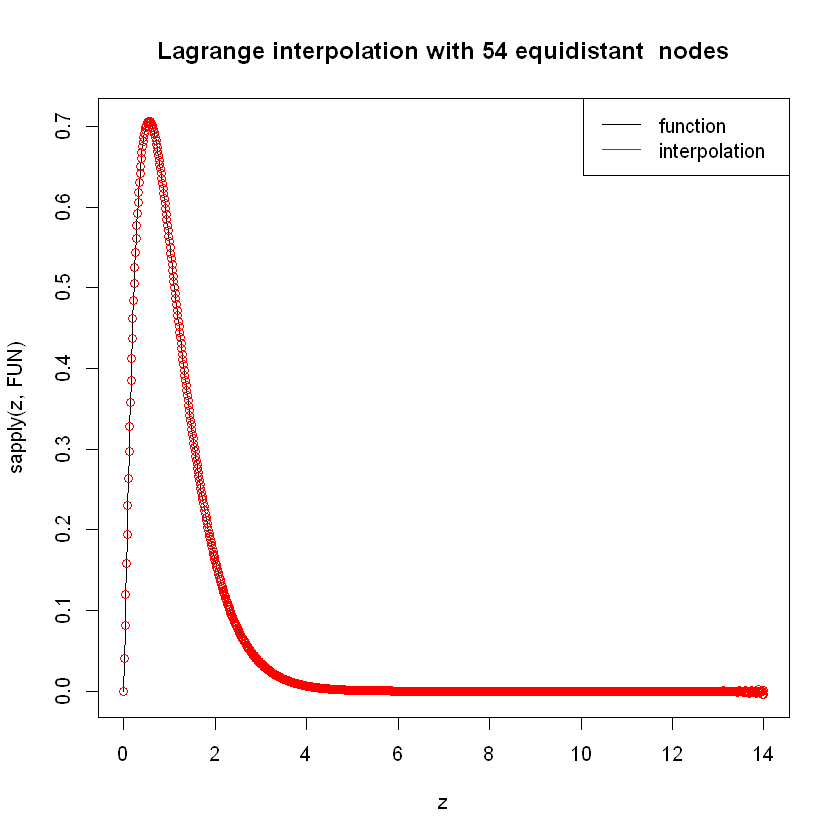

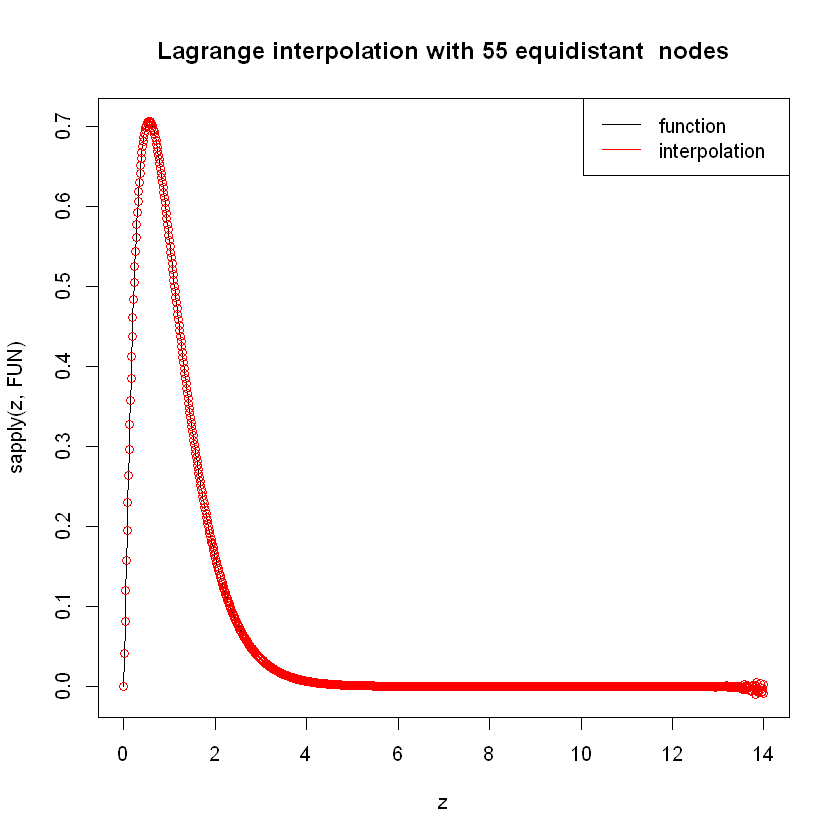

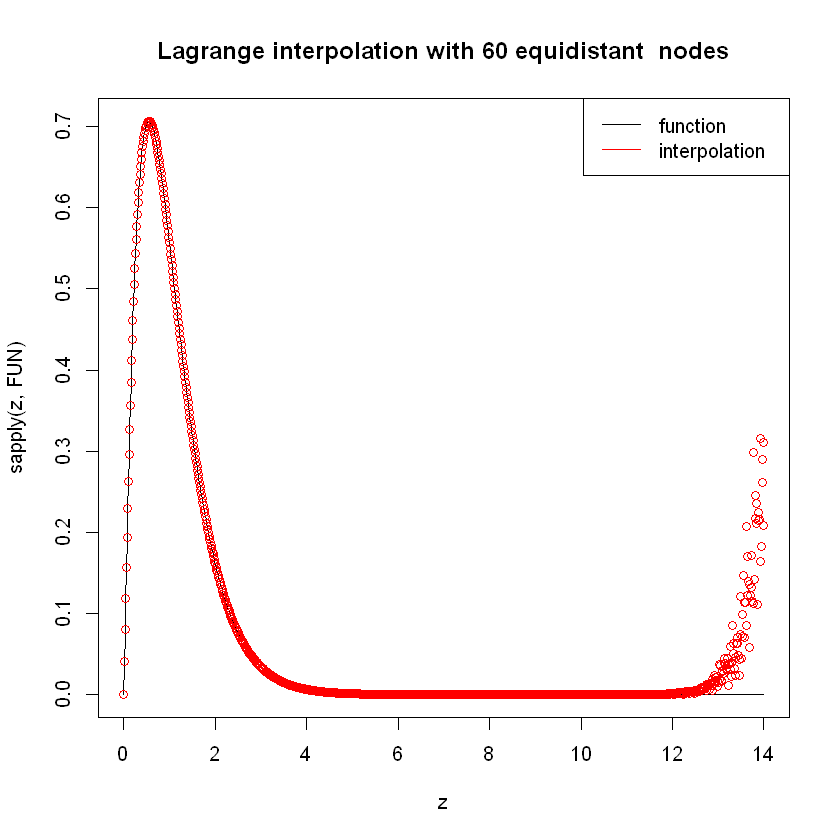

In [3]:
# Noeuds Equidistants


interpolLagrange(9,a,b,1000,'equi',densite,TRUE,FALSE)
interpolLagrange(19,a,b,1000,'equi',densite,TRUE,FALSE)
interpolLagrange(29,a,b,1000,'equi',densite,TRUE,FALSE)
interpolLagrange(39,a,b,1000,'equi',densite,TRUE,FALSE)
interpolLagrange(51,a,b,1000,'equi',densite,TRUE,FALSE)
interpolLagrange(53,a,b,1000,'equi',densite,TRUE,FALSE)
interpolLagrange(54,a,b,1000,'equi',densite,TRUE,FALSE)
interpolLagrange(59,a,b,1000,'equi',densite,TRUE,FALSE)

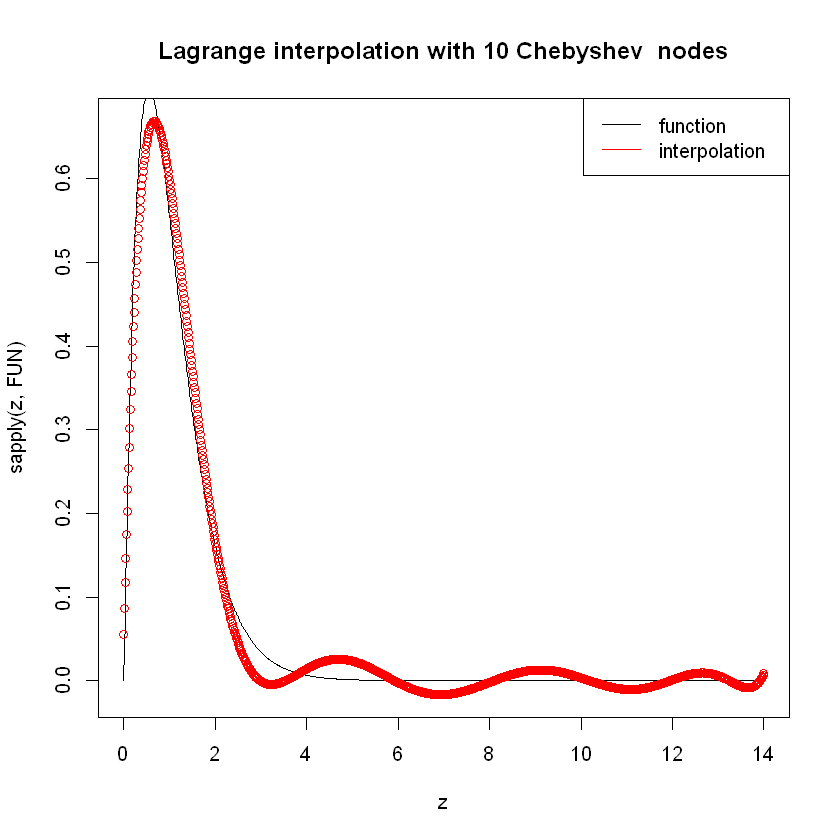

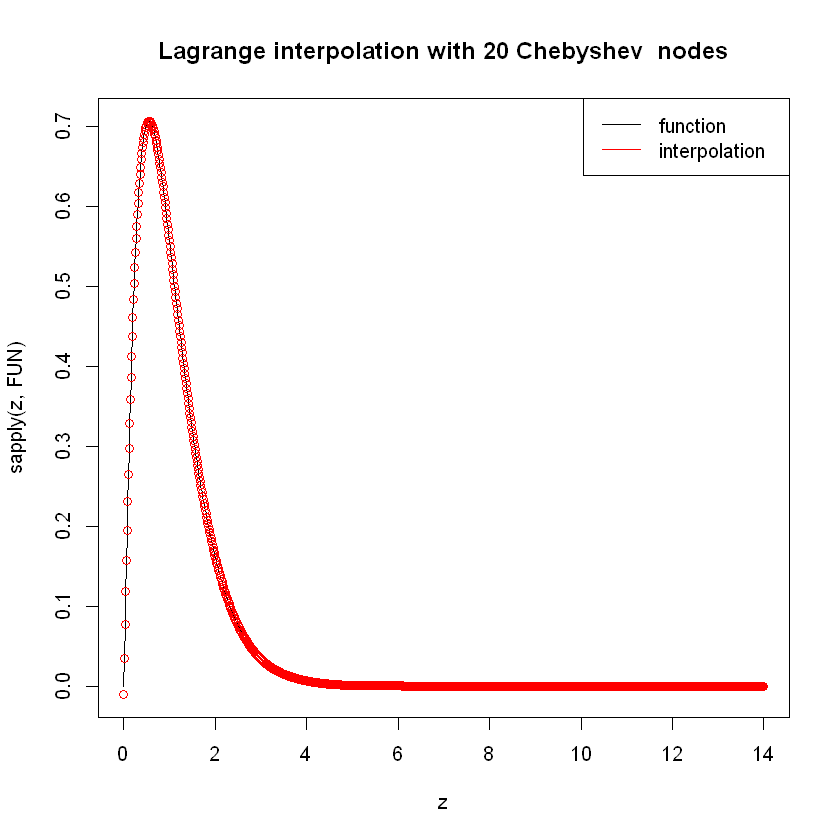

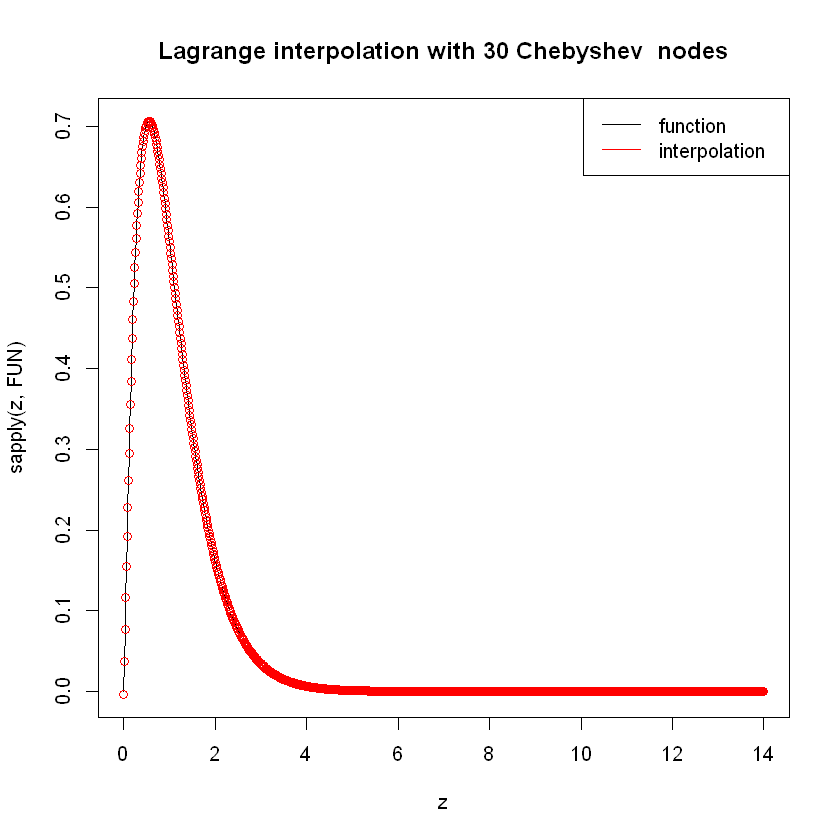

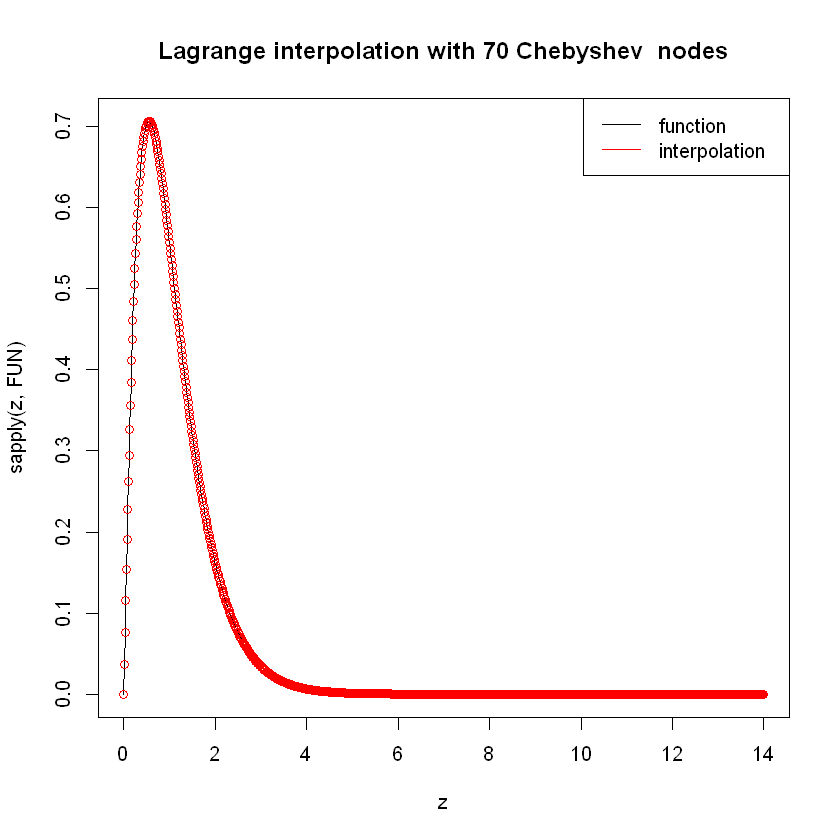

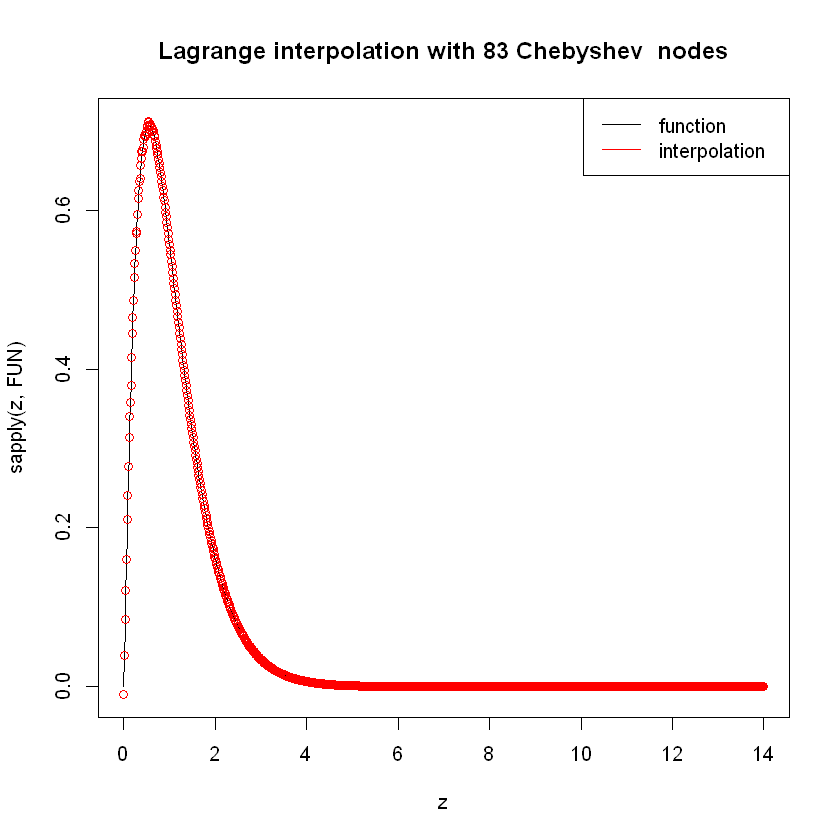

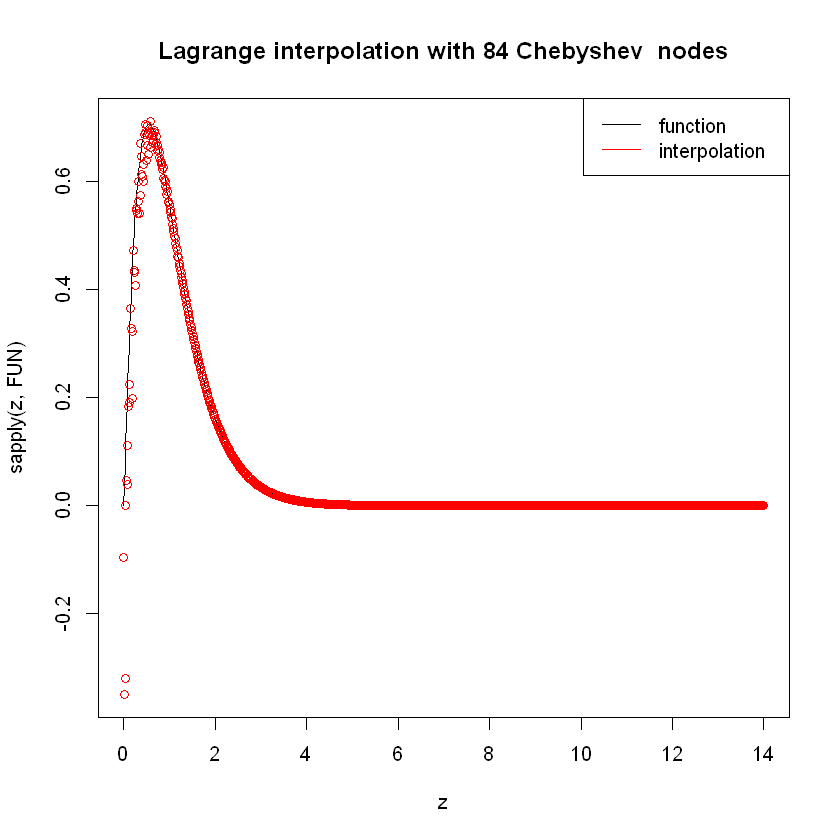

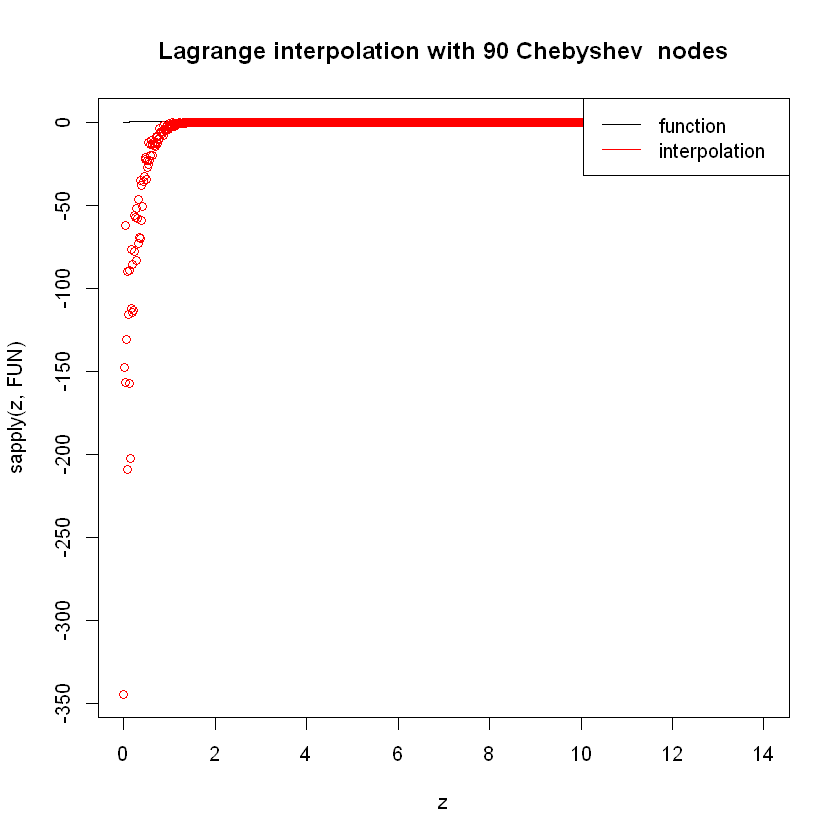

In [4]:
# Noeuds de Chebychev

interpolLagrange(9,a,b,1000,'cheby',densite,TRUE, FALSE)
interpolLagrange(19,a,b,1000,'cheby',densite,TRUE, FALSE)
interpolLagrange(29,a,b,1000,'cheby',densite,TRUE,FALSE)
interpolLagrange(69,a,b,1000,'cheby',densite,TRUE,FALSE)
interpolLagrange(82,a,b,1000,'cheby',densite,TRUE,FALSE)
interpolLagrange(83,a,b,1000,'cheby',densite,TRUE,FALSE)
interpolLagrange(89,a,b,1000,'cheby',densite,TRUE,FALSE)

Nous pouvons observer que lorsque l'on augmente le nombre de noeuds, dans les deux cas, le polynôme d'interpolation approxime de mieux en mieux la fonction densité jusqu'à un certain degré à partir duquel, l'approximation devient de moins en moins bonne. Cela est le phénomène de Runge. <br> Il apparait autour de n = 54 avec les noeuds équidistants et n = 83 avec les  noeuds de Tchebychev. 

Cela s'explique du fait que la norme infinie de l'erreur d'approximation est majorée par un terme qui dépend de la norme du polynôme nodal. Cette norme "explose" pour les grandes valeurs de n et donc faire une interpolation avec des polynômes de degré élevé ne fournit pas forcément une meilleure approximation. De plus, le rapport entre la norme du polynôme nodal aux n noeuds de Tchebychev et celui aux n noeux équidistants est de l'ordre de : $(\frac{e}{4})^n$
Ce rapport est négligeable devant 1 lorsque n tend vers l'infini et cela explique pourquoi on peut prendre plus de points d'approximation avec les noeuds de Tchebychev.

###### Question 2 (a)

Nombre d’évaluations de la fonction ’densite’ nécéssaires pour appliquer l’interpolation de lagrange de degré n par morceaux avec M sous
intervalles : <br>
 - Noeuds de équidistants. 
 Avec une interpolation de Lagrange de degré n, on a n+1 points par intervalle. Le total est donc M*(n+1). Toutefois, il faut enlever tous les points aux extrémités des sous intervalles (sauf $x_0$ et $x_{fin}$ ) car sinon on les comptes deux fois.  <br>
 On a donc neval = M*(n+1) - (M-1) = M*n +1 
 
 
 - Noeuds de Chebychev.
 On a plus le problème de superposition des points aux extrémités, donc neval = M*(n+1)

###### Question 2 (b)

[1] "Best (M,n) : ( 3 , 49 )  , erreur associée : 0.00146033153544476"


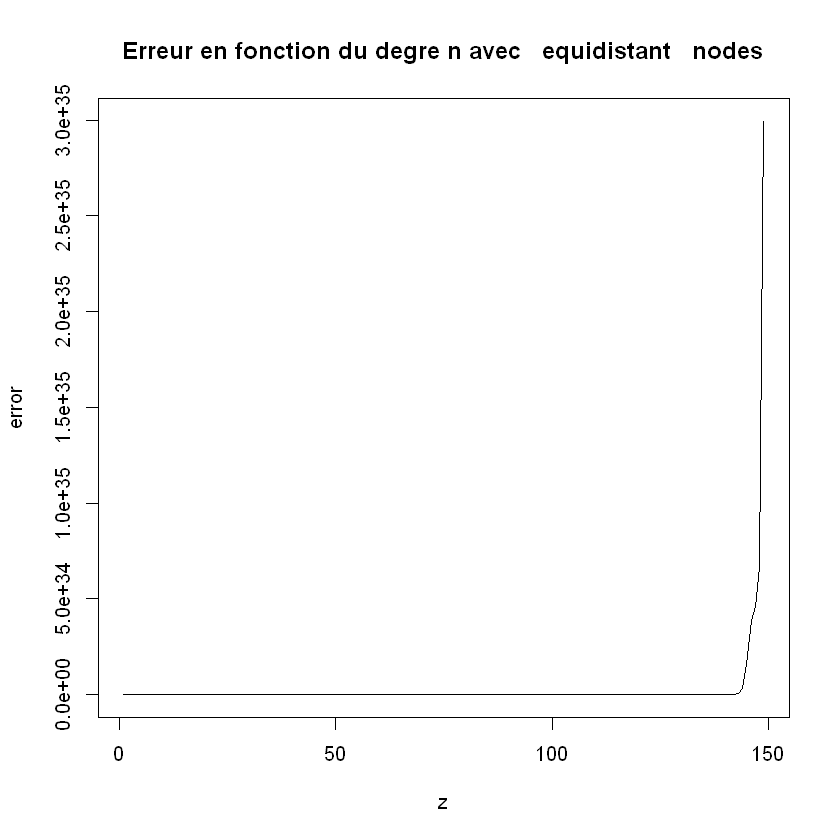

In [5]:
bequi = choose(neval = 150, a = 0, b = 14, nodes = "equi", densite, TRUE)
print(paste("Best (M,n) : (", toString(bequi[1]), ",", toString(bequi[2]),') ' ,", erreur associée :", toString(bequi[3])))

[1] "Best (M,n) : ( 2 , 66 ) , erreur associée : 0.000284273481177711"


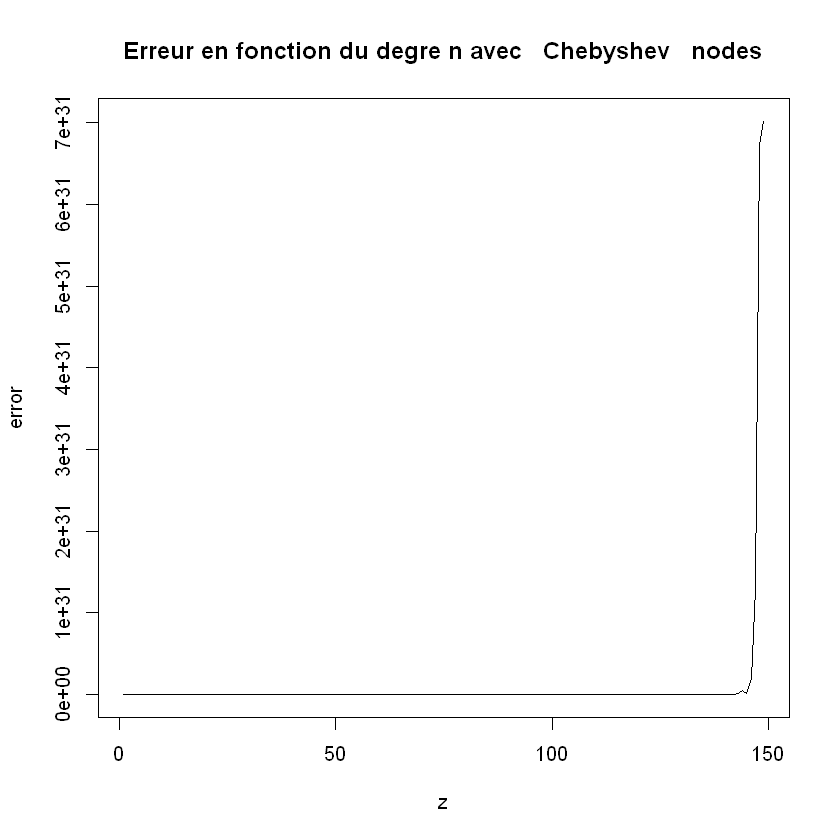

In [6]:
bcheby = choose(neval = 150, a = 0, b = 14, nodes = "cheby", densite, TRUE)
print(paste("Best (M,n) : (", toString(bcheby[1]), ",", toString(bcheby[2]), ")", ", erreur associée :", toString(bcheby[3])))

On voit que l'erreur d'approximation explose quand n devient trop grand. Si on diminue neval, on voit que l'erreur d'approximation a tendance à baisser jusqu'à un degré n et après elle augmente. L'erreur augmente à cause du phénomène de Runge. 

L'algorithme cherche le meilleur compromis entre M et n. Il va donc choisir le n le plus grand possible avant l'apparition du phénomène de Runge tout en choississant le bon nombre d'intervalle.

[1]  1.000000000 53.000000000  0.004911728  0.042494167

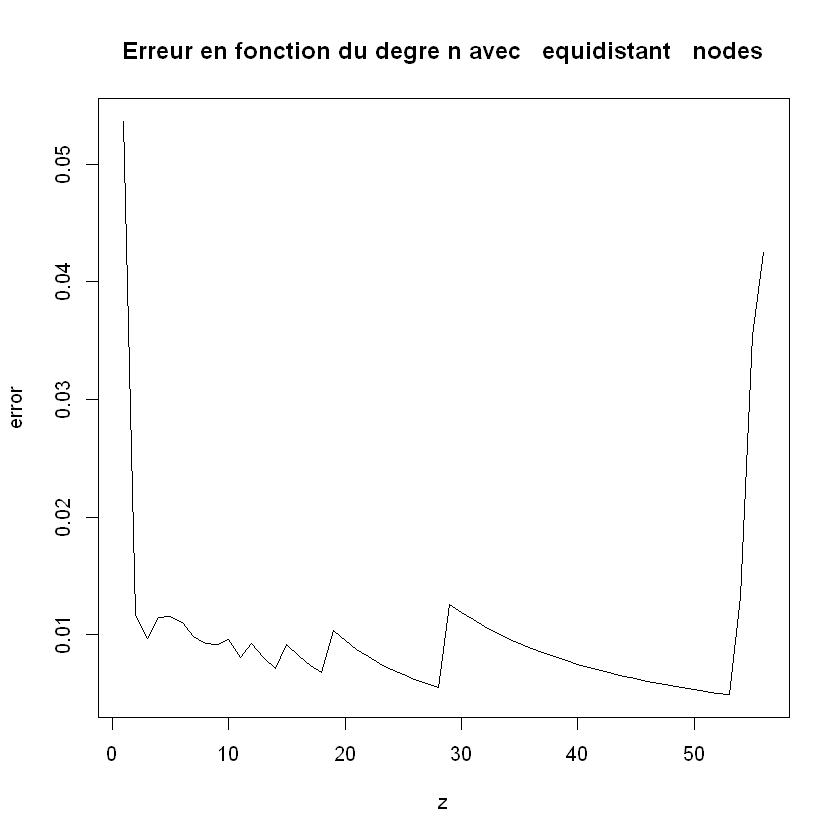

[1] 1.000000e+00 7.800000e+01 3.724134e-04 4.080538e-03

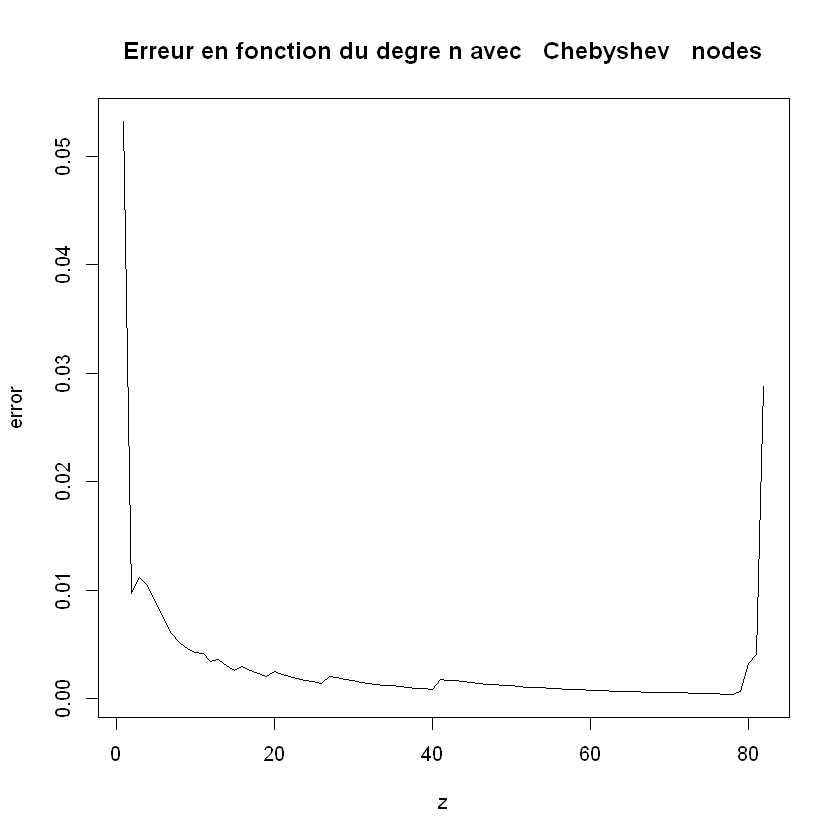

In [7]:
choose(neval = 57, a = 0, b = 14, nodes = "equi", densite, TRUE)
choose(neval = 83, a = 0, b = 14, nodes = "cheby", densite, TRUE)

## Méthodes de quadrature

## 3.1 Méthode de Simpson

##### Question 1 (a)

La méthode de Simpson travaille avec une interpolation de degré 2.
Avec, ce qu'on a vu précédent :
M = $\frac{81 - 1}{2}$ = 40

##### Question 1 (b)

In [8]:
a = 0 
b = 3.5

# Ici on prend M_simpson = M/2 car la fonction codée en TP
# renvoie une erreur correspondant au double du paramètre M 
# passé en argument
err = evalErrSimpson(densite,a,b,20)[1]
I_m = evalErrSimpson(densite,a,b,20)[2]
print(paste("Error : ", err, " et Î_m : ", I_m))

[1] "Error :  8.42201343053498e-06  et Î_m :  0.991449400163624"


In [9]:
# Vérification de la valeur de Î_m
simpsonInt(densite,a,b,40)

[1] 0.9914494

##### Question 1 (c)

Calculons la vraie erreur

In [10]:
E_vraie = abs(simpsonInt(densite,a,b,40) - pgamma(b, shape = K, scale = THETA))
E_vraie

[1] 3.864528e-05

In [11]:
E_posteriori =  evalErrSimpson(densite,a,b,20)[1]
E_posteriori 

[1] 8.422013e-06

Calculons l'erreur relative commise sur l'erreur d'intégration.

In [12]:
E_relative = abs((E_posteriori - E_vraie)/E_vraie)
E_relative

[1] 0.7820688

L'erreur à posteriori est différente à 78% de la vraie erreur, le résultat n'est pas très satisfaisant. 

Les erreurs ne sont pas les mêmes car l'erreur a posteriori est calculée en comparant $ \hat I_M -  \hat I_{\frac{M}{2}} $. C'est donc une approximation car on suppose que $ \hat I_M$ tend vers I quand M tend vers  +$\infty$ et que la dérivée n+1 de f ne varie pas trop. On cumule les erreurs sur $ \hat I_M $ et $ \hat I_{\frac{M}{2}} $.

## 3.2 Méthode de Romberg

##### Question 1

In [13]:
FUN = densite 
n = 20 
a = 0 
b = 3.5
M = 2

x = seq(0,n)
estRomberg= romberg(FUN,n,a,b,M)

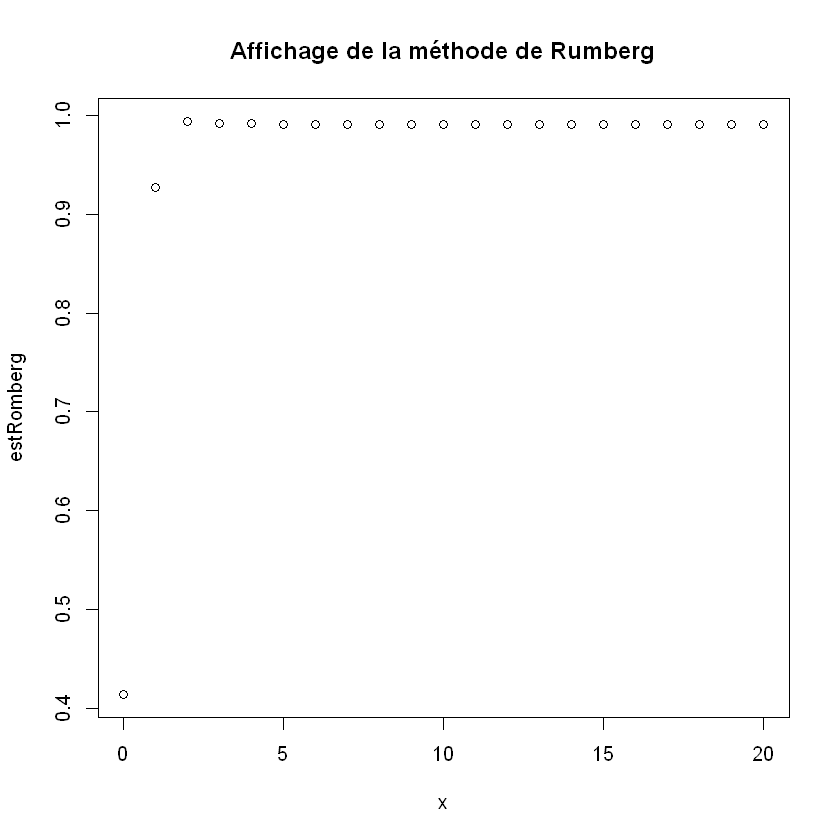

In [14]:
plot(x,estRomberg)
title(main = "Affichage de la méthode de Rumberg")

On voit qu'à partir de n = 2, la valeur renvoyée par la méthode  de Romberg atteint une valeur seuil et ne semble plus évoluée significativement après.  

##### Question 2

In [15]:
I = pgamma(b, shape = K, scale = THETA)
Log_err = log(abs(estRomberg - I))
Log_errnaif = c()
for (i in 0:n){
    I_m = simpsonInt(densite,a,b,2^i*M)
    err = log(abs(I_m - I))
    Log_errnaif = c(Log_errnaif,err)
}

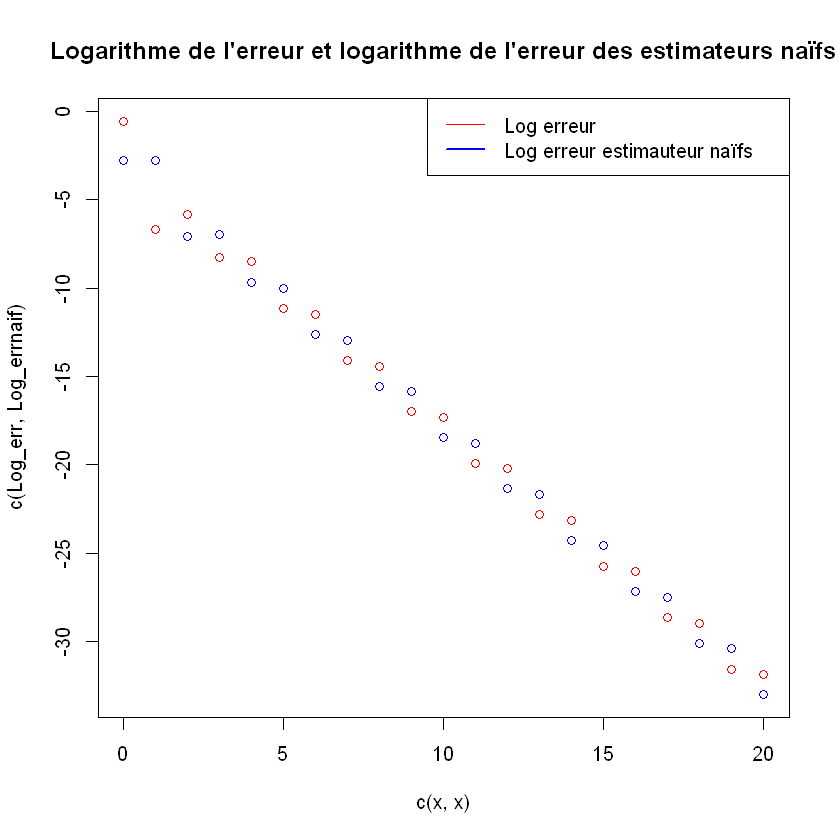

In [16]:
plot(c(x,x),c(Log_err,Log_errnaif), col = c('red','blue'))
title(main = "Logarithme de l'erreur et logarithme de l'erreur des estimateurs naïfs")   
legend('topright', legend = c('Log erreur','Log erreur estimauteur naïfs'),
               lwd=c(1,2), col=c('red','blue'))

In [17]:
pente = (Log_err[length(Log_err)] - Log_err[5])/(x[length(Log_err)]-x[5])
pente

[1] -1.461655

On remarque que le log des erreurs est linéaire et que les deux méthodes ont à peu près la même pente. On en déduit qu'elles ont le même ordre. 

Les pentes des courbes est à peu près -2, ce qui nous donne que l'erreur est en h² et donc la méthode est d'ordre 1.